# Ch 6. Time Series Analysis and Forecasting

In [2]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 4.7 MB/s eta 0:00:00


# □ 실습: to find the best ETS model using the AutoETS approach

## 1. Import the libraries:

In [4]:
from sktime.forecasting.ets import AutoETS
from sklearn.metrics import mean_absolute_percentage_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
import pandas as pd

In [46]:
df_train = pd.read_csv('/content/df_train.csv')

In [47]:
df_train

,Date,unemp_rate
0,2010-01-01,10.6
1,2010-02-01,10.4
2,2010-03-01,10.2
3,2010-04-01,9.5
4,2010-05-01,9.3
...,...,...
103,2018-08-01,3.9
104,2018-09-01,3.6
105,2018-10-01,3.5
106,2018-11-01,3.5


## 2. Fit the AutoETS model:

In [48]:
# 'Date' 열을 인덱스로 설정
df_train.set_index('Date', inplace=True)

# 인덱스를 DatetimeIndex로 변환
df_train.index = pd.to_datetime(df_train.index)

# 이제 to_period()를 사용하여 인덱스를 PeriodIndex로 변환
df_train = df_train.to_period(freq='M')  # 'M'은 월 단위로 변환하는 의미

auto_ets = AutoETS(auto=True, n_jobs=-1, sp=12)
auto_ets.fit(df_train)
auto_ets_fcst = auto_ets.predict(fh=list(range(1, 13)))

In [49]:
auto_ets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:                      ETS(MAdA)   Log Likelihood                  67.065
Date:                Thu, 19 Sep 2024   AIC                            -96.130
Time:                        07:16:17   BIC                            -45.169
Sample:                    01-31-2010   HQIC                           -75.467
                         - 12-31-2018   Scale                            0.000
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.6209      0.094      6.608      0.000       0.437       0.805
smoothing_trend         0.0204        nan        nan        nan         nan         nan
smoothing_seasonal   3.791e-05        nan        nan        nan         nan         nan
damping_trend           0.9800        nan        nan        nan         nan         nan
initial_level          10.7174        nan        nan        nan         nan         nan
initial_trend          -0.1119      0.043     -2.577      0.010      -0.197      -0.027
initial_seasonal.0     -0.6403        nan        nan        nan         nan         nan
initial_seasonal.1     -0.7357        nan        nan        nan         nan         nan
initial_seasonal.2     -0.7085        nan        nan        nan         nan         nan
initial_seasonal.3     -0.6169        nan        nan        nan         nan         nan
initial_seasonal.4     -0.3149        nan        nan        nan         nan         nan
initial_seasonal.5     -0.1465        nan        nan        nan         nan         nan
initial_seasonal.6     -0.2301        nan        nan        nan         nan         nan
initial_seasonal.7     -0.7316        nan        nan        nan         nan         nan
initial_seasonal.8     -0.7838        nan        nan        nan         nan         nan
initial_seasonal.9     -0.3214        nan        nan        nan         nan         nan
initial_seasonal.10    -0.1175        nan        nan        nan         nan         nan
initial_seasonal.11          0        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       28.47   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.13   Prob(JB):                         0.92
Heteroskedasticity (H):               1.69   Skew:                            -0.04
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## 3. Add the model's forecast to the plot of the Holt-Winters' forecasts:

In [50]:
hw_df = pd.read_csv('/content/hw_df.csv')

In [51]:
hw_df.head()

,Date,unemp_rate,hw_1,hw_2
0,2010-01-01,10.6,10.610345,10.819175
1,2010-02-01,10.4,10.385374,10.627873
2,2010-03-01,10.2,10.098710,10.350404
3,2010-04-01,9.5,9.566994,9.819440
4,2010-05-01,9.3,9.528641,9.778234


In [52]:
# 'Date' 열을 인덱스로 설정
hw_df.set_index('Date', inplace=True)

# 인덱스를 DatetimeIndex로 변환
hw_df.index = pd.to_datetime(hw_df.index)

# 이제 to_period()를 사용하여 인덱스를 PeriodIndex로 변환
hw_df = hw_df.to_period(freq='M')  # 'M'은 월 단위로 변환하는 의미


In [53]:
hw_df.head()

,unemp_rate,hw_1,hw_2
Date,,,
2010-01,10.6,10.610345,10.819175
2010-02,10.4,10.385374,10.627873
2010-03,10.2,10.098710,10.350404
2010-04,9.5,9.566994,9.819440
2010-05,9.3,9.528641,9.778234


In [54]:
auto_ets_df = hw_df.copy()
fitted_values = auto_ets._fitted_forecaster.fittedvalues

In [55]:
fitted_values

,0
Date,
2010-01,10.607821
2010-02,10.377871
2010-03,10.082768
2010-04,9.592593
2010-05,9.486910
...,...
2018-08,3.949599
2018-09,3.587765
2018-10,3.475675


In [44]:
auto_ets_fcst["unemp_rate"]

,unemp_rate
2019-01,4.260275
2019-02,4.121511
2019-03,3.896837
2019-04,3.413999
2019-05,3.446217
2019-06,3.928098
2019-07,3.992538
2019-08,3.805336
2019-09,3.484808
2019-10,3.375178


In [56]:
auto_ets_df["auto_ets"] = pd.concat([fitted_values, auto_ets_fcst["unemp_rate"]], axis = 0).values

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import pandas as pd

# SettingWithCopyWarning 경고를 무시하는 코드
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

In [60]:
phi = 0.9727862595099785

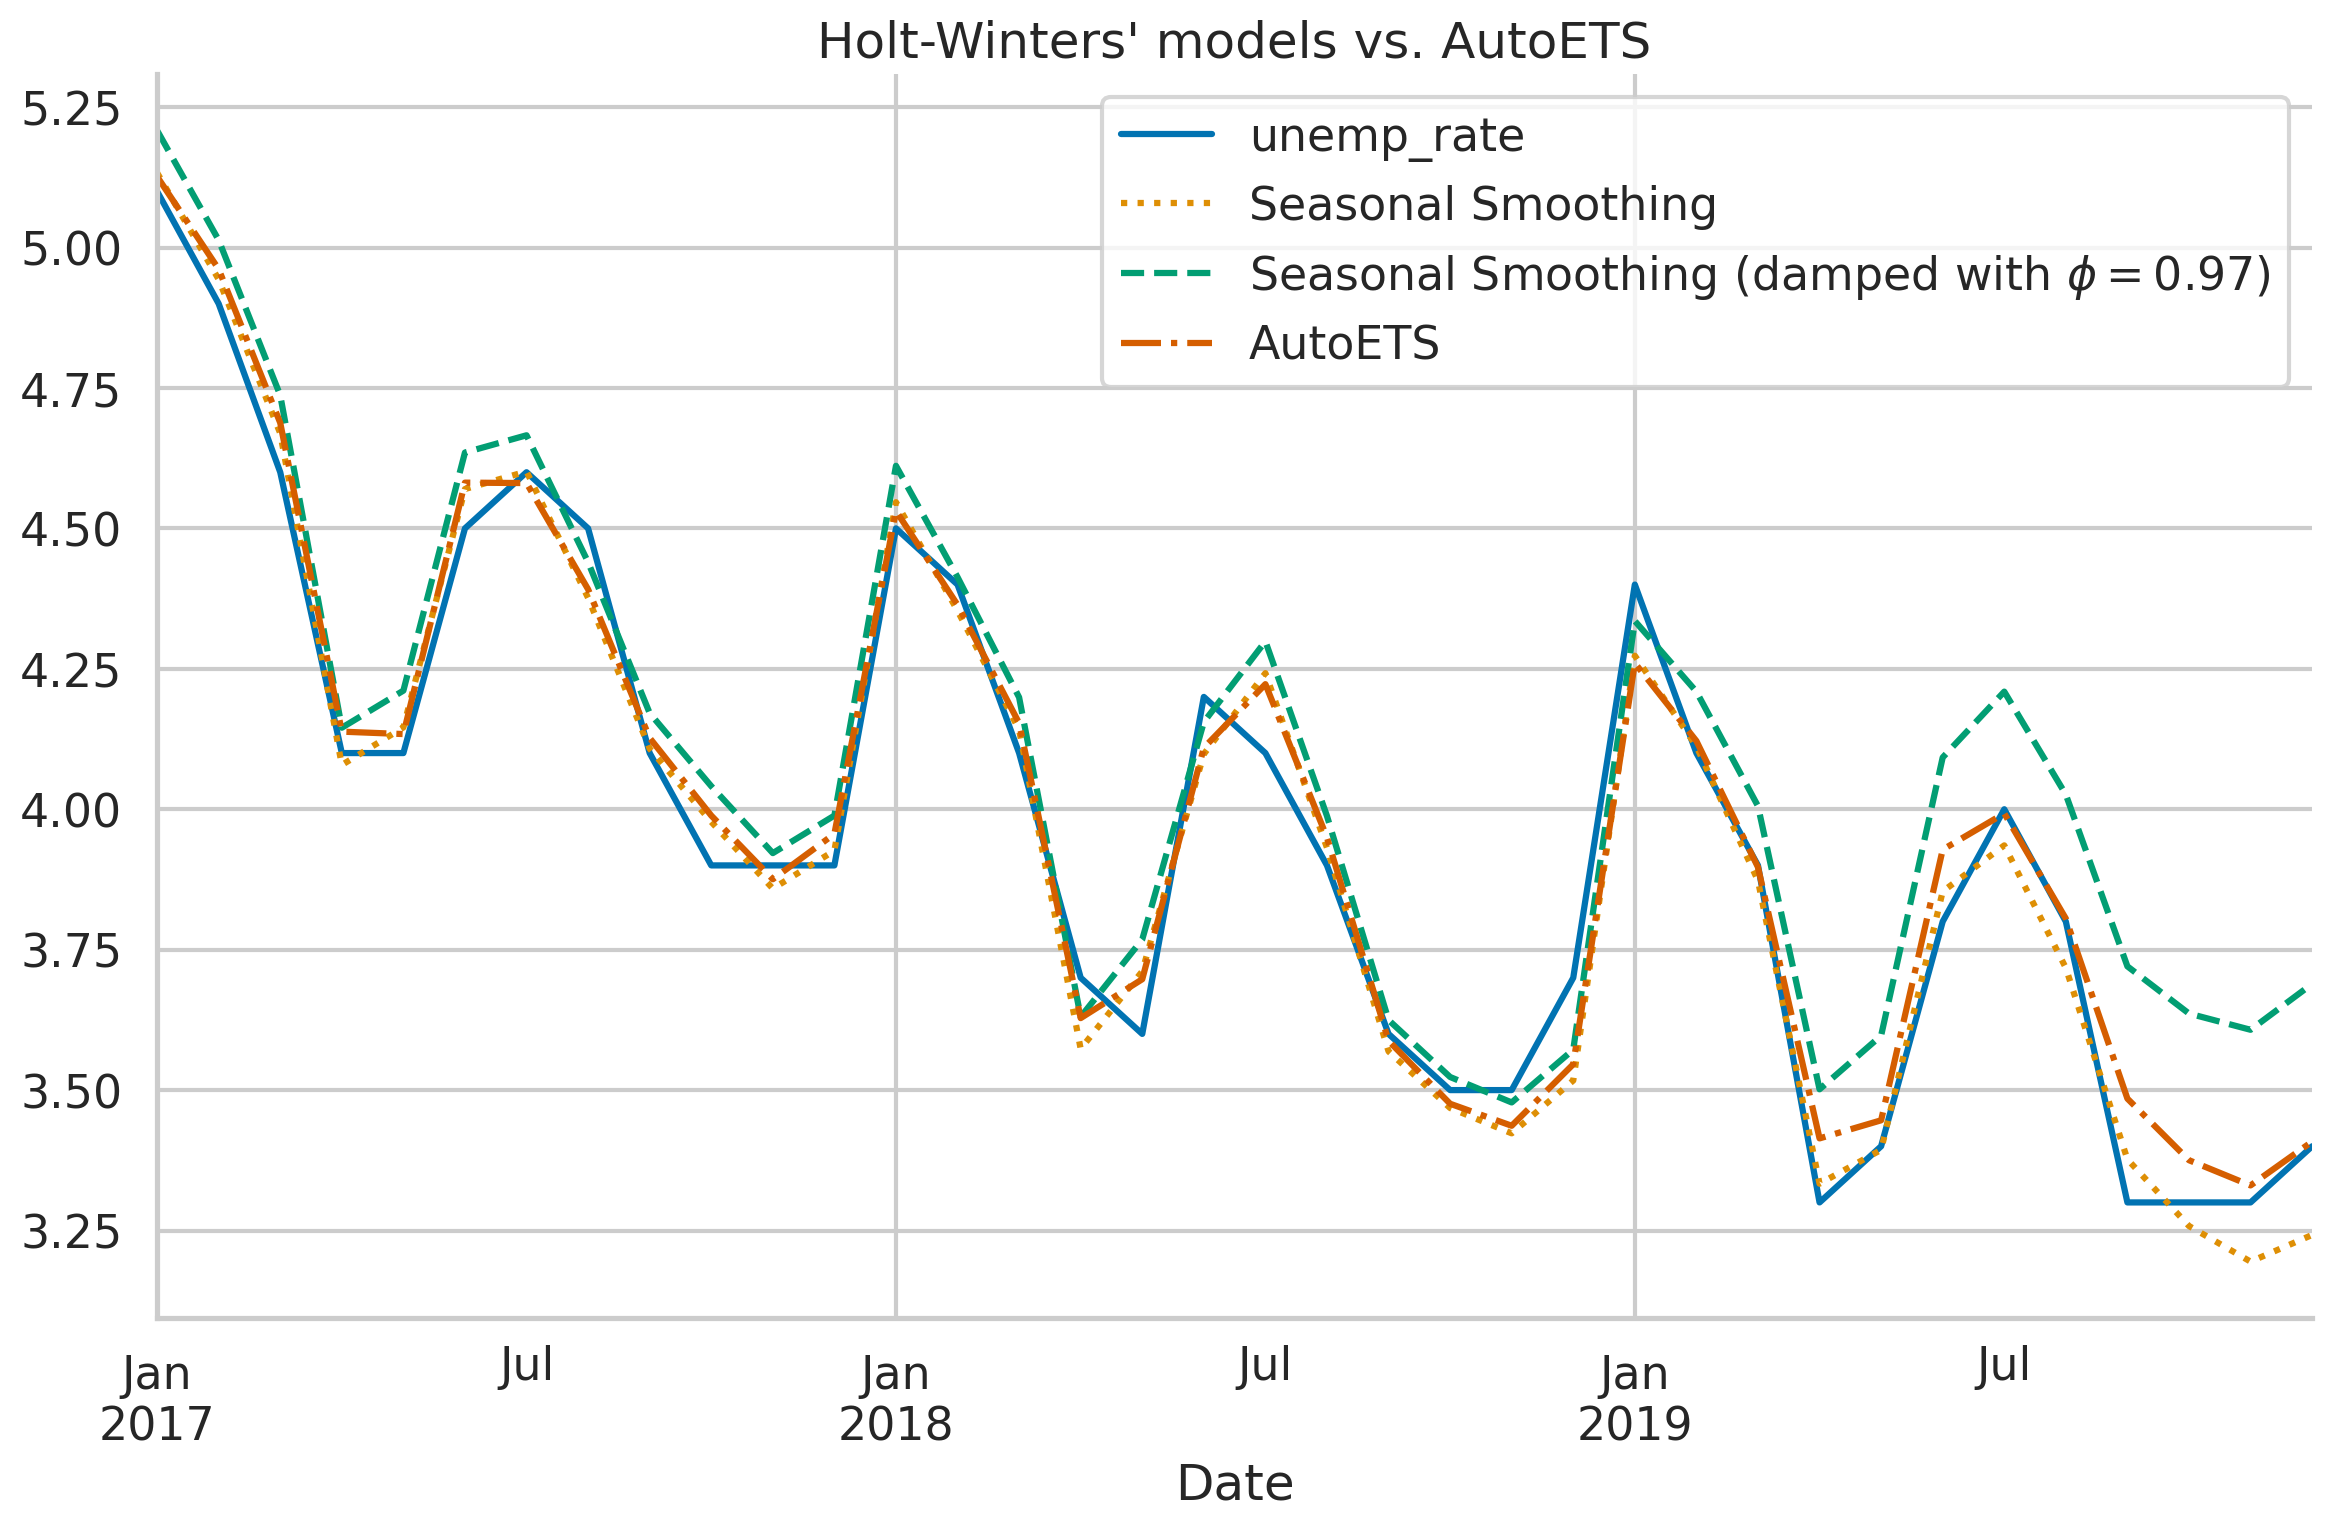

In [61]:
fig, ax = plt.subplots()
auto_ets_df["2017":].plot(
    style=["-",":","--","-."], ax=ax,
    title="Holt-Winters' models vs. AutoETS"
)
labels = [
    "unemp_rate",
    "Seasonal Smoothing",
    f"Seasonal Smoothing (damped with $\phi={phi:.2f}$)",
    "AutoETS",
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

→ 분석
- Holt-Winters 모델과 AutoETS의 샘플 내 적합도는 매우 유사</br>
- 예측에서는 두 모델이 차이를 보이며, 어느 것이 실업률을 더 잘 예측하는지 판단하기 어려움</br>

이에 따라...

시계열 예측(및 다른 분야)에서 널리 사용되는 평가 지표인 평균 절대 백분율 오차(MAPE)를 계산

## 4. Calculate the MAPEs of the Holt-Winters' forecasts and the ones from AutoETS:

In [118]:
hw_forecast_1 = pd.read_csv('/content/hw_forecast_1.csv')
hw_forecast_2 = pd.read_csv('/content/hw_forecast_2.csv')
df_test = pd.read_csv('/content/df_test.csv')

In [119]:
hw_forecast_1.columns = ['Date', 'unemp_rate']
hw_forecast_2.columns = ['Date', 'unemp_rate']

In [120]:
hw_forecast_1.head()

,Date,unemp_rate
0,2019-01-01,4.273305
1,2019-02-01,4.112096
2,2019-03-01,3.872844
3,2019-04-01,3.333365
4,2019-05-01,3.393625


In [121]:
fcst_dict = {
    "Seasonal Smoothing": hw_forecast_1,
    "Seasonal Smoothing (damped)": hw_forecast_2,
    "AutoETS": auto_ets_fcst,
}

print("MAPEs ----")
for key, value in fcst_dict.items():
  # print(value.iloc[:,1])
    mape = mean_absolute_percentage_error(df_test.unemp_rate, value.unemp_rate)
    print(f"{key}: {100 * mape:.2f}%")

MAPEs ----
Seasonal Smoothing: 1.81%
Seasonal Smoothing (damped): 6.53%
AutoETS: 1.78%


→ 예측 정확도가 비슷하다

성능 평가 지표 중...</br>
Mean Absolute Percentage Error를 사용했는데</br>
관측값과 예측값의 차이 비교하는 방법...

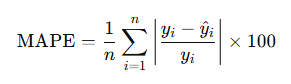